In [10]:
import os
import cv2
import spacy
import operator
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.io import loadmat
%matplotlib inline

In [5]:
load_extr = np.load('../data/processed/labelled_faces.txt')
correct_extracts = dict(load_extr[()])
np.shape(correct_extracts['Norah Jones'])

(10,)

In [12]:
def convert_to_rgb(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

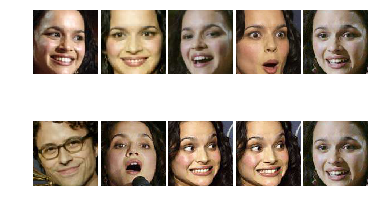

In [24]:
def celeb_test(celeb):
    data = np.random.rand(10,10)
    N = len(correct_extracts[celeb])
    cols = 5
    rows = int(np.ceil(N / cols))
    gs = gridspec.GridSpec(rows, cols, wspace=0.05, hspace=0.05)
    fig = plt.figure()
    
    for n in range(N):
        img = convert_to_rgb(correct_extracts[celeb][n])
        ax = fig.add_subplot(gs[n])
        ax.imshow(img)
        ax.axis('off')

    plt.show()

celeb_test('Norah Jones')

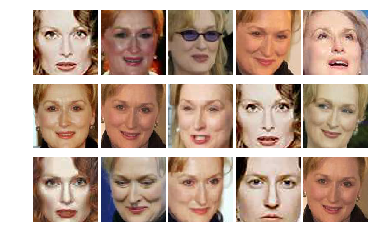

In [25]:
celeb_test('Meryl Streep')

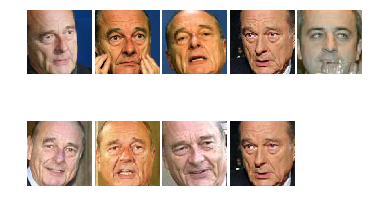

In [26]:
celeb_test('Jacques Chirac')

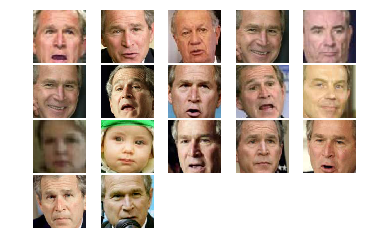

In [27]:
celeb_test('George W. Bush')

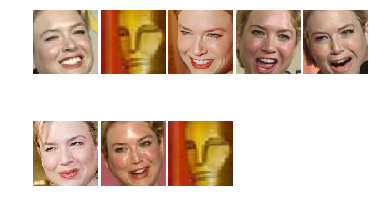

In [28]:
celeb_test('Renee Zellweger')

56 of the 68 images above are correctly labelled (82%). The neural net will have difficulty for some names than others. We can eliminate all names with fewer than three images associated.

In [30]:
count_names = {}

for key, val in correct_extracts.items():
    if len(val)>=3 and key!='Actor':
        if key[-1]=='<':
            key=key[:-1]
        if key[0]=='>':
            key=key[1:]
        count_names[key] = len(val)

print(dict(sorted(count_names.items(), key=operator.itemgetter(1), reverse=True)))

{'Bush': 181, 'Colin Powell': 72, 'Donald Rumsfeld': 37, 'Gerhard Schroeder': 28, 'Abdullah Gul': 21, 'Ariel ': 21, 'Chavez': 20, 'Blair': 20, 'Chretien': 17, 'George W. Bush': 17, 'Meryl Streep': 15, 'Tony Blair': 15, 'John Negroponte': 15, 'Junichiro Koizumi': 13, 'Hugo Chavez': 13, 'Jack Straw': 12, 'Jones': 12, 'Jan': 12, 'Annan': 11, 'Jeremy Greenstock': 11, 'Blix': 11, 'Tom Ridge': 10, 'Norah Jones': 10, 'Julianne Moore': 10, 'John Kerry': 10, 'Hans Blix': 10, 'Jacques Chirac': 9, 'Mariucci': 9, 'Ricardo Lagos': 9, 'Catherine Zeta-': 9, 'Saddam Hussein': 9, 'Kidman': 8, 'George Robertson': 8, 'Bill Graham': 8, 'Jose Maria Aznar': 8, 'Renee Zellweger': 8, 'Igor Ivanov': 8, 'Jean Chretien': 8, 'Chirac': 8, 'Ashcroft': 8, 'Ron Dittemore': 6, 'John Manley': 6, 'Bill Callahan': 6, 'Kuchma': 5, 'Alberto Fujimori': 5, 'Polanski': 5, 'Carter': 5, 'Hamister': 5, 'Putin': 5, 'Bolton': 5, 'Ridge': 5, ' Ruth Morris': 5, 'Bill': 5, 'Kamal Kharrazi': 5, 'Arnett': 5, 'Michael Bloomberg': 5, 'Jo